#### **<font color='green'>Import Lib</font>**

In [196]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

<font color='green'>**Import data**</font>

In [197]:
df = pd.read_csv('data.csv')
df = df[["Date", "RF_LeThuy"]]

#### **Pro-precessing**

In [198]:
# Replace 'x' = mode_value
mode_value = df.iloc[:, 1].mode()[0]
df.iloc[:, 1] = df.iloc[:, 1].replace('x', mode_value)
df['Month'] = df['Date'].str.split('/').str.get(0)


In [199]:
# Del col Date
df = df.drop('Date', axis=1)

In [200]:
df = df.apply(pd.to_numeric, errors='coerce')
# df = df.astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16071 entries, 0 to 16070
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   RF_LeThuy  16071 non-null  float64
 1   Month      16071 non-null  int64  
dtypes: float64(1), int64(1)
memory usage: 251.2 KB


#### **Split Data to 2 part of year**

In [201]:
dt1 = df[df['Month'].between(1, 8) | df['Month'].between(12, 12)]
dt2 = df[df['Month'].between(9, 11)]

In [202]:
dt1 = dt1.drop('Month', axis=1)
dt2 = dt2.drop('Month', axis=1)

#### **Implement Linear Regression From Sklearn**

In [203]:
from sklearn.linear_model import LinearRegression
model_LR = LinearRegression()

In [204]:
dt1

,RF_LeThuy
0,0.0
1,1.5
2,1.4
3,4.6
4,0.3
...,...
16066,0.0
16067,0.0
16068,0.0
16069,0.4


Mean Squared Error (MSE): 124.880973511
R-squared (R²): 0.061220265


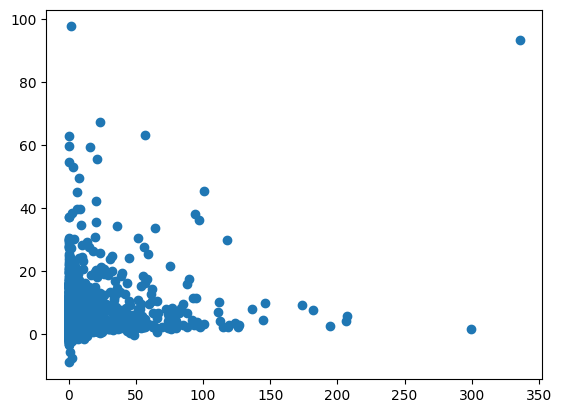

In [241]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
d = dt1
n_days = 12
for i in range(n_days):
    d[f'Day-{i}'] = d['RF_LeThuy'].shift(-i)
d = d.dropna()
d = d.drop(columns=['Day-0'])
X_first = d.drop('RF_LeThuy', axis=1).astype(float)
y_first = d['RF_LeThuy'].astype(float)

X_train, X_test, y_train, y_test = train_test_split(X_first, y_first, train_size=0.2)
model_LR.fit(X_train, y_train)
y_pred = model_LR.predict(X_test)
plt.scatter(y_test, y_pred)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.9f}")
print(f"R-squared (R²): {r2:.9f}")

In [192]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, accuracy_score

def score(df, days):
  for i in range(days):
    df[f'Day-{i}'] = df['RF_LeThuy'].shift(-i)
  df = df.dropna()
  df = df.drop(columns=['Day-0'])
  X_first = df.drop('RF_LeThuy', axis=1).astype(float)
  y_first = df['RF_LeThuy'].astype(float)
  X_train, X_test, y_train, y_test = train_test_split(X_first, y_first, train_size=0.2)
  model_LR.fit(X_train, y_train)
  y_pred = model_LR.predict(X_test)
  r2 = r2_score(y_test, y_pred)
  mae = mean_absolute_error(y_test, y_pred)
  mse = mean_squared_error(y_test, y_pred)
  print(f'\tScore : r2 = {r2}, mae = {mae}, mse = {mse}')

In [194]:
for i in range(2, 120):
  print(f'Số ngày dự đoán trước đó : {i}')
  score(dt2, i)


Số ngày dự đoán trước đó : 2
	Score : r2 = 0.014945571112722544, mae = 20.52932766286259, mse = 1478.7220495044332
Số ngày dự đoán trước đó : 3
	Score : r2 = 0.06249182259466546, mae = 19.486071335390513, mse = 1556.1645446726961
Số ngày dự đoán trước đó : 4
	Score : r2 = 0.018708001515276296, mae = 20.531442671931956, mse = 1417.6358431264566
Số ngày dự đoán trước đó : 5
	Score : r2 = -0.04268752024160327, mae = 20.991021853354322, mse = 1587.1093461502992
Số ngày dự đoán trước đó : 6
	Score : r2 = 0.0015247362431318745, mae = 20.758276956341117, mse = 1624.1912492083927
Số ngày dự đoán trước đó : 7
	Score : r2 = 0.01114059487286212, mae = 20.085334305065427, mse = 1494.1845799424025
Số ngày dự đoán trước đó : 8
	Score : r2 = 0.04769345319972018, mae = 20.60012764840406, mse = 1511.1556686221247
Số ngày dự đoán trước đó : 9
	Score : r2 = 0.04902663789506434, mae = 19.789828753392452, mse = 1483.8913628748244
Số ngày dự đoán trước đó : 10
	Score : r2 = 0.03759776055186448, mae = 20.370

C:\Users\Admin\AppData\Local\Temp\ipykernel_2864\1087839190.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'Day-{i}'] = df['RF_LeThuy'].shift(-i)
C:\Users\Admin\AppData\Local\Temp\ipykernel_2864\1087839190.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'Day-{i}'] = df['RF_LeThuy'].shift(-i)
C:\Users\Admin\AppData\Local\Temp\ipykernel_2864\1087839190.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider jo

	Score : r2 = -0.09334105803851589, mae = 23.459237219912385, mse = 1678.4906410068224
Số ngày dự đoán trước đó : 101
	Score : r2 = -0.0313185240848326, mae = 21.679760953462065, mse = 1698.4706758302236
Số ngày dự đoán trước đó : 102
	Score : r2 = -0.10628831289589691, mae = 23.22122449830338, mse = 1622.1881262506852
Số ngày dự đoán trước đó : 103
	Score : r2 = -0.07250092855588286, mae = 22.686677453397763, mse = 1596.702252742794
Số ngày dự đoán trước đó : 104
	Score : r2 = -0.10601544783889172, mae = 23.53627849732988, mse = 1683.1626767181453
Số ngày dự đoán trước đó : 105
	Score : r2 = -0.09850288836602217, mae = 23.224381663225085, mse = 1667.7460147089248
Số ngày dự đoán trước đó : 106
	Score : r2 = -0.03135489798727087, mae = 22.110901323320025, mse = 1638.6037845211647
Số ngày dự đoán trước đó : 107


C:\Users\Admin\AppData\Local\Temp\ipykernel_2864\1087839190.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'Day-{i}'] = df['RF_LeThuy'].shift(-i)
C:\Users\Admin\AppData\Local\Temp\ipykernel_2864\1087839190.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'Day-{i}'] = df['RF_LeThuy'].shift(-i)
C:\Users\Admin\AppData\Local\Temp\ipykernel_2864\1087839190.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider jo

	Score : r2 = 0.024023228966743693, mae = 20.426635392276502, mse = 1681.9350335245404
Số ngày dự đoán trước đó : 108
	Score : r2 = -0.07439690650952424, mae = 22.95569758798361, mse = 1705.7709348846981
Số ngày dự đoán trước đó : 109
	Score : r2 = -0.08023898902563675, mae = 23.256673755694216, mse = 1575.2916185319652
Số ngày dự đoán trước đó : 110


C:\Users\Admin\AppData\Local\Temp\ipykernel_2864\1087839190.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'Day-{i}'] = df['RF_LeThuy'].shift(-i)
C:\Users\Admin\AppData\Local\Temp\ipykernel_2864\1087839190.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'Day-{i}'] = df['RF_LeThuy'].shift(-i)
C:\Users\Admin\AppData\Local\Temp\ipykernel_2864\1087839190.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider jo

	Score : r2 = -0.1002687517129508, mae = 23.74342090114616, mse = 1695.0497420435893
Số ngày dự đoán trước đó : 111
	Score : r2 = -0.061230802658312156, mae = 22.695711292319295, mse = 1702.9527978199646
Số ngày dự đoán trước đó : 112
	Score : r2 = -0.0716131002980247, mae = 23.03069832697173, mse = 1656.3040580287295
Số ngày dự đoán trước đó : 113
	Score : r2 = -0.06393915987089227, mae = 22.4974460617744, mse = 1674.5064783385137
Số ngày dự đoán trước đó : 114


C:\Users\Admin\AppData\Local\Temp\ipykernel_2864\1087839190.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'Day-{i}'] = df['RF_LeThuy'].shift(-i)
C:\Users\Admin\AppData\Local\Temp\ipykernel_2864\1087839190.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'Day-{i}'] = df['RF_LeThuy'].shift(-i)
C:\Users\Admin\AppData\Local\Temp\ipykernel_2864\1087839190.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider jo

	Score : r2 = -0.12187229166299263, mae = 24.3016495048949, mse = 1765.9561827660846
Số ngày dự đoán trước đó : 115
	Score : r2 = -0.04170577516705376, mae = 22.92647419213008, mse = 1715.3772668535223
Số ngày dự đoán trước đó : 116
	Score : r2 = -0.10163571402894123, mae = 24.10134740444984, mse = 1679.3203426589369
Số ngày dự đoán trước đó : 117


C:\Users\Admin\AppData\Local\Temp\ipykernel_2864\1087839190.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'Day-{i}'] = df['RF_LeThuy'].shift(-i)
C:\Users\Admin\AppData\Local\Temp\ipykernel_2864\1087839190.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'Day-{i}'] = df['RF_LeThuy'].shift(-i)
C:\Users\Admin\AppData\Local\Temp\ipykernel_2864\1087839190.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider jo

	Score : r2 = -0.023620407813962796, mae = 21.14578281501988, mse = 1678.1855450086491
Số ngày dự đoán trước đó : 118
	Score : r2 = -0.08866537902056315, mae = 23.323089108817285, mse = 1711.7438934234594
Số ngày dự đoán trước đó : 119
	Score : r2 = -0.09611950912467448, mae = 23.621112260053057, mse = 1757.753561986614


C:\Users\Admin\AppData\Local\Temp\ipykernel_2864\1087839190.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'Day-{i}'] = df['RF_LeThuy'].shift(-i)
C:\Users\Admin\AppData\Local\Temp\ipykernel_2864\1087839190.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'Day-{i}'] = df['RF_LeThuy'].shift(-i)
